### Customer Database
- attr: username, password, qr_images, loyaltyPoint

### Vendor Database
- attr: username, password

In [23]:
# takes the Customer and updates customer database
def updateCustomer(Customer):        
    return 


### UserRetriever
- search user or vendor database and returns the user or vendor class

In [154]:
class UserRetriever():
    def retrieveCustomer(username, password):
        # Search customer database and return customer class
        return Customer()
        
    
    def retrieveVendor(username, password):
        # Search vendor database and return vendor class
        return Vendor()
        

### Voucher
- every voucher has a voucherID and associated with a username and amount
- QR using generate_qr_image() only when needed

In [44]:
import uuid
import qrcode
class Voucher():
    def __init__(self, username, amount):
        self.username = username                                     # tagged to customer's username
        self.amount = amount
        self.voucherID = uuid.uuid1().hex
    def get_voucherID(self):
        return self.voucherID
    def get_amount(self):
        return self.amount
    def get_username(self):
        return self.username
    def generate_qr(self):
        qr_generator = qrcode.QRCode(version=1,
                                     box_size=10,
                                     border=5)
        input_data = f"{self.username},{self.voucherID},{self.amount}"
        qr_generator.clear()
        qr_generator.add_data(input_data)
        return qr_generator.make_image() 

In [45]:
V = Voucher("jacky",50)

In [46]:
V.get_voucherID(),V.get_amount(),V.get_username()

('b39e5e55f41511eb979b9cb6d0216836', 50, 'jacky')

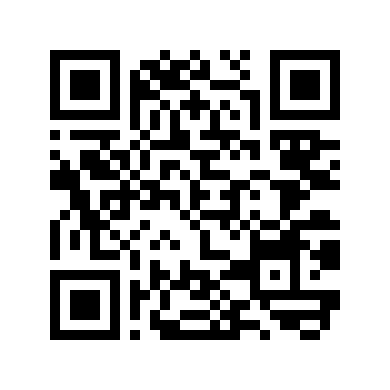

In [47]:
V.generate_qr()

### Customer
- customer is identified by username
- customer will have password, Vouchers( list of Voucher and loyalty points)

In [48]:
class Customer():
    def __init__(self, 
                 username:str, 
                 # password:str, 
                 Vouchers:list , 
                 loyaltyPoints: int): 
        self.username = username
        # self.password = password
        self.Vouchers = Vouchers
        self.loyaltyPoints = loyaltyPoints
        self.cart = {10: 0,                    # these are the only voucher options
                     20: 0,
                     50: 0,
                     100: 0} 
        
    def add_voucher(self, voucherAmount):
        self.cart[voucherAmount]+=1
    def drop_voucher(self, voucherAmount):
        if self.cart[voucherAmount]>0:
            self.cart[voucherAmount]-=1
                
    def purchase(self):
        # assume payment made successfully
        successful = True
        if successful:
            for amount in self.cart:
                while self.cart[amount]>0:
                    self.Vouchers.append(Voucher(self.username, amount))
                    self.cart[amount]-=1
    # call updateDatabase(username) right after    
    
    
    def get_username(self):
        return self.username
    def get_Vouchers(self):
        return self.Vouchers
    def get_loyaltyPoints(self):
        return self.loyaltyPoints

In [57]:
C = Customer("Jack","eedo1dw029",[],100)

In [58]:
C.add_voucher(10)
C.add_voucher(50)
C.add_voucher(100)
C.drop_voucher(100)

In [59]:
C.purchase()

In [60]:
C.get_username(),C.get_loyaltyPoints()

('Jack', 100)

In [65]:
C.get_Vouchers()

[<__main__.Voucher at 0x130a45c0df0>, <__main__.Voucher at 0x130a45c0d30>]

### Vendor

In [72]:
class Vendor():
    def __init__(self,username,password):
        self.username = username
        self.password = password
    def scanQR(self, value):                   # input should be "jacky,cf7788eff41511ebb4939cb6d0216836,50"
        customerUsername, voucherID, amount  = value.split(',')    
        self.expireVoucher(customerUsername,voucherID)
            
    # this is called by the vendor when customer uses a voucher - requires username to search for customer in customer database
    # expires the voucher with matching voucherID
    def expireVoucher(self,customerUsername,voucherID):
        return
        
        # should update customer database/ remove the voucher

In [73]:
V = Vendor("Vendor0","213254353")

In [74]:
V.scanQR("jacky,cf7788eff41511ebb4939cb6d0216836,50") # jacky has used his 50 dollar voucher

# DEPRECIATED

#### QRGenerator

In [47]:
import qrcode
class QRGenerator():
    def __init__(self): 
        self.qr_generator = qrcode.QRCode(version=1,
                                          box_size=10,
                                          border=5)
        
    def generate_qr(self,username, voucherID):
                    input_data = f"{username},{voucherID}"
                    self.qr_generator.clear()
                    self.qr_generator.add_data(input_data)
                    return self.qr_generator.make_image() 

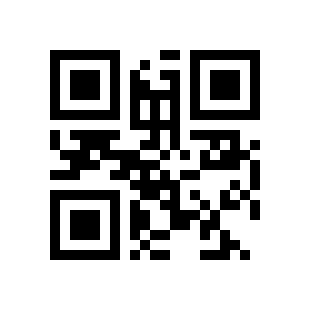

In [48]:
Gen  = QRGenerator()
Gen.generate_qr("jacky","V124")    # scanning this gives "jacky,V124"